In [65]:
from Graham import Graham_ as graham
from Jarvis import Jarvis_ as jarvis
from przyrostowy import przyrostowy_ as incremental
from UpperAndLower import UpperAndLower_ as upperAndLower
from QuickHull import QuickHull_ as quickHull
from dziel_i_rzadz import convex_hull_ as divideAndConquer
from Chan import Chan_ as chan
import numpy as np
from time import time

In [28]:
# to generate random data
def generate_points_square(amount, low, high):
    a = np.random.rand(amount).astype(np.float64) * (high - low) + low
    b = np.random.rand(amount).astype(np.float64) * (high - low) + low
    return list(zip(a, b))

def generate_points_circle(amount, radius):
    x = np.random.rand(amount).astype(np.float64) * 2 * np.pi
    a = np.cos(x) * radius
    b = np.sin(x) * radius
    return list(zip(a, b))

def generate_points_segment(amount, a, b, low, high):
    x = np.random.rand(amount).astype(np.float64) * (high - low) + low
    t = (x - a[0]) / (b[0] - a[0])
    y = a[1] + (b[1] - a[1]) * t
    return list(zip(x, y))

In [45]:
# do zapisywania do pliku + odczytywania 
def save(plot, name): 
    points = []
    for i in range(len(plot.get_added_points())):
        for point in plot.get_added_points()[i].points:
            points.append(point)

    with open(f'{name}.json', 'w') as file:
       file.write(js.dumps(points))
    
def load(name):  
    points = []
    with open(name + '.json', 'r') as file:
        points = js.loads(file.read())
    return points
    

<IPython.core.display.Javascript object>


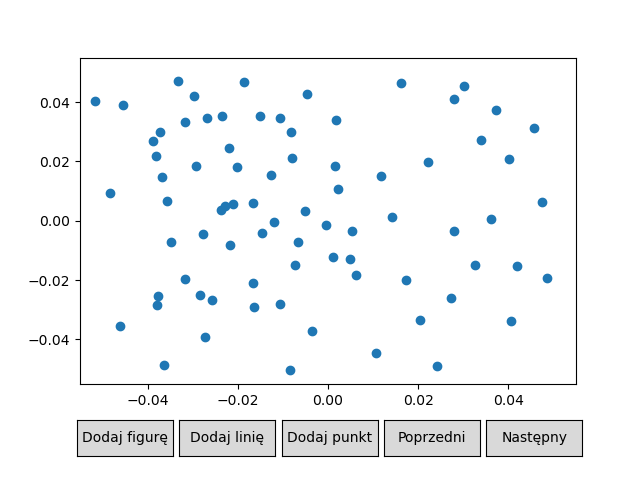

In [33]:
plot = Plot(scenes=[Scene()])
plot.draw()

In [48]:
save(plot, "test1")
points = load("test1")

In [66]:
def compareTime(data):
    start = time()
    graham(data)
    result = time() - start
    print("czas działania dla algorytmu Grahama to ", result, "sekund")
    
    start = time()
    jarvis(data)
    result = time() - start
    print("czas działania dla algorytmu Jarvis to ", result, "sekund")
    
    start = time()
    incremental(data) # gdzies tutaj trzeba usunac printa
    result = time() - start
    print("czas działania dla algorytmu przyrostowego to ", result, "sekund")
    
    start = time()
    upperAndLower(data)
    result = time() - start
    print("czas działania dla algorytmu górnej i dolnej otoczki to ", result, "sekund")
    
    start = time()
    quickHull(data)
    result = time() - start
    print("czas działania dla algorytmu QuickHull to ", result, "sekund")
    
    # todo- coś tu sie sypie
#     start = time()
#     hulls = []
#     divideAndConquer(data)
#     result = time() - start
#     print("czas działania dla algorytmu dziel i rządź to ", result, "sekund")
    
    start = time()
    chan(data, 4)
    result = time() - start
    print("czas działania dla algorytmu Chan'a to ", result, "sekund")

In [67]:
compareTime(points)

czas działania dla algorytmu Grahama to  0.0015888214111328125 sekund
czas działania dla algorytmu Jarvis to  0.002869844436645508 sekund
czas działania dla algorytmu przyrostowego to  0.0033299922943115234 sekund
Number of points in hull: 12
czas działania dla algorytmu górnej i dolnej otoczki to  0.0007691383361816406 sekund
czas działania dla algorytmu QuickHull to  0.0005292892456054688 sekund
czas działania dla algorytmu Chan'a to  0.0015058517456054688 sekund
